## Stock Price Prediction

### Get data from yfinance

In [219]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf

yf.pdr_override()
import pandas as pd

ticker_list=["AAPL", "MSFT", "AMZN", "TSLA", "GOOGL"]
today = date.today()
# We can get data by our choice by giving days bracket
start_date= "2015-01-01"
end_date="2020-11-30"

files=[]
def getData(ticker):
    data = pdr.get_data_yahoo(ticker, start=start_date, end=today)
    # dataname= ticker+"_"+str(today)
    files.append((data,ticker))
    
for tik in ticker_list:
    getData(tik)
    
    



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
ticker = 'AAPL'
data = pdr.get_data_yahoo(ticker, start=start_date, end=today)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,18.233213,19.121429,18.178572,19.006071,16.439852,659492400
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.960695,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.746613,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.280138,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.184374,484156400
...,...,...,...,...,...,...
2022-01-24,160.020004,162.300003,154.699997,161.619995,161.619995,162706700
2022-01-25,158.979996,162.759995,157.020004,159.779999,159.779999,115798400
2022-01-26,163.500000,164.389999,157.820007,159.690002,159.690002,108275300


### Setup firebase

In [ ]:
import firebase_admin

cred_obj = firebase_admin.credentials.Certificate('../../../fyp2022-stockpriceprediction-firebase-adminsdk-ku62m-f9ed330292.json')
fyp_app = firebase_admin.initialize_app(cred_obj, {
	'databaseURL':"https://fyp2022-stockpriceprediction-default-rtdb.asia-southeast1.firebasedatabase.app/",
	'storageBucket': 'fyp2022-stockpriceprediction.appspot.com'
	})

In [288]:
#https://cloud.google.com/storage/docs/downloading-objects#storage-download-object-python
from firebase_admin import storage
b = storage.bucket()
for ind, file in enumerate(b.list_blobs()):
    if(i<3):
        continue
    #print(file.download_to_filename('1.zip'))
    break

In [289]:
#https://stackoverflow.com/questions/53304517/how-to-retrieve-image-from-firebase-storage-using-python
file.generate_signed_url(timedelta(seconds=300), method='GET')

'https://storage.googleapis.com/fyp2022-stockpriceprediction.appspot.com/normalizers/TSLA/multi_lstm.pkl?Expires=1644330859&GoogleAccessId=firebase-adminsdk-ku62m%40fyp2022-stockpriceprediction.iam.gserviceaccount.com&Signature=lWzBiW7D3%2Foa%2Fi8ySOsUe8JGUzMFPS%2BYBDqrEDzLDM%2BBX1BcVtWKqZHDc7zQzc42QDlcYwP2Bivb7ohRhoDUFXvfgbUUQlZDZe3kxVvC45ZR8%2BcMcpuf6seUChm4l24K6ZGGS4m4b73OTAJo3lpvCIJL6BfkajvsqRxcxxYDtXJS7cAlHCuQTZh3IA0pMWbVXDaHeqKpcuO4dfWpbkFLHmin9jpwxTQZHX9ttbuPQ%2Fb791v%2FnlUyzT8aatWMYkh%2BzmWzjB4v94u3RmSbcxc3kvdVk4aHPE1YAYI3bNDBWd4nYEYQ9iR4OSDRC2%2B7Ll9qbEEP8cC9%2F0gQbMFRcHzLxg%3D%3D'

In [290]:
url = 'https://storage.googleapis.com/fyp2022-stockpriceprediction.appspot.com/normalizers/TSLA/multi_lstm.pkl?Expires=1644330859&GoogleAccessId=firebase-adminsdk-ku62m%40fyp2022-stockpriceprediction.iam.gserviceaccount.com&Signature=lWzBiW7D3%2Foa%2Fi8ySOsUe8JGUzMFPS%2BYBDqrEDzLDM%2BBX1BcVtWKqZHDc7zQzc42QDlcYwP2Bivb7ohRhoDUFXvfgbUUQlZDZe3kxVvC45ZR8%2BcMcpuf6seUChm4l24K6ZGGS4m4b73OTAJo3lpvCIJL6BfkajvsqRxcxxYDtXJS7cAlHCuQTZh3IA0pMWbVXDaHeqKpcuO4dfWpbkFLHmin9jpwxTQZHX9ttbuPQ%2Fb791v%2FnlUyzT8aatWMYkh%2BzmWzjB4v94u3RmSbcxc3kvdVk4aHPE1YAYI3bNDBWd4nYEYQ9iR4OSDRC2%2B7Ll9qbEEP8cC9%2F0gQbMFRcHzLxg%3D%3D'

In [ ]:
import cloudpickle as cp
from urllib.request import urlopen
loaded_pickle_object = cp.load(urlopen(url, 'rb')) 

In [292]:
pip install cloudpickle

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pyrebase

config = {
  "apiKey": firebase_admin.credentials.Certificate('../../../fyp2022-stockpriceprediction-firebase-adminsdk-ku62m-f9ed330292.json'),
  "authDomain": "fyp2022-stockpriceprediction.firebaseapp.com",
  'databaseURL':"https://fyp2022-stockpriceprediction-default-rtdb.asia-southeast1.firebasedatabase.app/",
  'storageBucket': 'fyp2022-stockpriceprediction.appspot.com',
  'serviceAccount': '../../../fyp2022-stockpriceprediction-firebase-adminsdk-ku62m-f9ed330292.json'
}

firebase = pyrebase.initialize_app(config)

In [ ]:
#https://stackoverflow.com/questions/48181580/download-all-files-from-firebase-storage-using-python
#https://github.com/thisbejim/Pyrebase#add-pyrebase-to-your-application
storage = firebase.storage()
for file in storage.child('models/AAPL/').list_files():
    with open(storage.child(file.name)) as f:
        word = f
    break

### Upload data into firebase


In [6]:
from firebase_admin import db
from datetime import datetime as dt

for file in files:
    
    tick = file[1]
    data = file[0]
    data['Ticker'] = tick
    
    #convert date index to string, as firebsae cant have datetime as an index
    data.index = data.index.strftime("%Y-%m-%d")
    
    #convert the dataframe to json/dictionary
    data_dict = data.to_dict(orient="index")
    
    #upload it to the database
    ref = db.reference("/data/"+tick)
    ref.set(data_dict)

### Get data from firebase database

In [158]:
from matplotlib import pyplot as plt
from firebase_admin import db
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
ref = db.reference("/data")
data = ref.get()

In [268]:
data_msft = {}
data_msft['MSFT'] = data['MSFT']

In [8]:
def get_all_file_paths(directory):
  
    # initializing empty file paths list
    file_paths = []
  
    # crawling through directory and subdirectories
    for root, directories, files in os.walk(directory):
        for fileName_model in files:
            # join the two strings in order to form the full filepath.
            filepath = os.path.join(root, fileName_model)
            file_paths.append(filepath)
  
    # returning all file paths
    return file_paths

### LSTM

In [272]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
from zipfile import ZipFile
import pickle
import os
from firebase_admin import storage
from sklearn.metrics import mean_squared_error
tf.debugging.set_log_device_placement(False)





try:
  # Specify an invalid GPU device
  #with tf.device('/device:GPU:2'):
  
#   with tf.device('/device:GPU:2'):
    for tick, stock_data in data_msft.items():
      print(tick)
      df = pd.DataFrame(stock_data).T
      df = df.reset_index()['Close']
      scaler = MinMaxScaler(feature_range=(0,1))
      df=scaler.fit_transform(np.array(df).reshape(-1,1))
      train_data = df[:int(0.9*len(df))]
      test_data = df[int(0.9*len(df)):]
      train_data = train_data.reshape(-1,1)
      test_data = test_data.reshape(-1,1)
      
      def create_dataset(dataset, time_step=1):
          dataX, dataY = [], []
          for i in range(len(dataset)-time_step-1):
              a = dataset[i:(i+time_step), 0]
              dataX.append(a)
              dataY.append(dataset[i + time_step, 0])
          return np.array(dataX), np.array(dataY)
      time_step = 60
      X_train, y_train = create_dataset(train_data, time_step)
      X_test, ytest = create_dataset(test_data, time_step)
      
      X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
      X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
      
      model=Sequential()
      model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
      model.add(LSTM(50,return_sequences=True))
      model.add(LSTM(50))
      model.add(Dense(1))
      model.compile(loss='mean_squared_error',optimizer='adam')
      history = model.fit(X_train, y_train,epochs=100, validation_split = 0.2)
      # break
      
      # calling function to get all file paths in the directory
      filepath_model = "../../../data/models/" + tick + "/lstm"
      model.save(filepath_model)
      file_paths = get_all_file_paths(filepath_model)

      
      #took help from this: https://www.geeksforgeeks.org/working-zip-files-python/
      with ZipFile(filepath_model + ".zip",'w') as zip:
              # writing each file one by one
              for file in file_paths:
                  zip.write(file)
      
      
      fileName_model = "lstm"
      bucket = storage.bucket()
    #   #upload models
      blob = bucket.blob("models/" + tick + "/" + fileName_model)
      blob.upload_from_filename(fileName_model+".zip")
      
      #upload normalizer
      filepath_normalizer = "../../../data/normalizers/" + tick + "/lstm.pkl"
      pickle.dump(scaler, open(filepath_normalizer, 'wb'))

      filename_normalizer = "lstm.pkl"
      blob = bucket.blob("normalizers/" + tick + "/" + filename_normalizer)
      blob.upload_from_filename(filepath_normalizer)
      
      # Opt : if you want to make public access from the URL
      #blob.make_public()
    # checking whether folder exists or not
      folder_path = filepath_model
      if os.path.exists(folder_path):

          # checking whether the folder is empty or not
          if len(os.listdir(folder_path)) == 0:
              # removing the file using the os.remove() method
              os.rmdir(folder_path)
          else:
              # messaging saying folder not empty
              print("Folder is not empty")
      else:
          # file not found message
          print("File not found in the directory")
        
except RuntimeError as e:
  print(e)

MSFT


In [64]:
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)

ytest = scaler.inverse_transform(ytest.reshape(-1,1))
error = math.sqrt(mean_squared_error(ytest,test_predict))
error    

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Option

73.64311682215732

In [47]:
train_predict=model.predict(X_train)
train_predict=scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
math.sqrt(mean_squared_error(y_train,train_predict))

3.0307830607276087

In [26]:
# specifying the zip file name
file_name = "AAPL_model.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
AAPL_model/keras_metadata.pb                   2022-01-12 19:16:08        17068
AAPL_model/saved_model.pb                      2022-01-12 19:16:08      2382689
AAPL_model/variables/variables.data-00000-of-00001 2022-01-12 19:16:08       618372
AAPL_model/variables/variables.index           2022-01-12 19:16:08         2731
Extracting all the files now...
Done!


In [110]:
#get the last 100 days and make a prediction
tick = 'AAPL'
def getTestData(ticker, start):
    data = pdr.get_data_yahoo(ticker, start=start, end=today)
    # dataname= ticker+"_"+str(today)
    return data[-100:]
    
   
   
from datetime import datetime, timedelta
start = d = today - timedelta(days=190)

df = getTestData(tick,start) 

#df = pd.DataFrame(stock_data).T
df = df.reset_index()['Close']
df=scaler.transform(np.array(df).reshape(-1,1))
test_data = df.reshape(-1,1)

import keras.models
model = keras.models.load_model(tick + '_model')
prediction = model.predict( np.array( [test_data,] )  )
scaler.inverse_transform(prediction)

[*********************100%***********************]  1 of 1 completed
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replic

array([[174.37128]], dtype=float32)

### Arima

In [73]:
from pmdarima.arima import auto_arima

stock_data = data['AAPL']
df = pd.DataFrame(stock_data).T

data = df.sort_index(ascending=True, axis=0)

train = data[:-2]
valid = data[-2:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8903.869, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8357.856, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8891.064, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8009.664, Time=0.47 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.58 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=8023.083, Time=0.39 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=8011.656, Time=0.56 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=8011.619, Time=1.13 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=8009.624, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=8358.974, Time=0.24 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=i

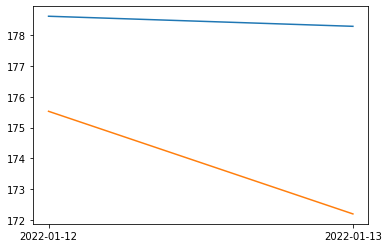

In [74]:
from matplotlib import pyplot as plt

plt.plot(forecast['Prediction'],label='Prediction')
plt.plot(valid['Close'], label='True value')
plt.show()

### Prophet

In [27]:
#importing prophet
from fbprophet import Prophet

stock_data = data['AAPL']
df = pd.DataFrame(stock_data).T

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:-10]
valid = new_data[-10:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

ModuleNotFoundError: No module named 'fbprophet'

### Custom ANN (wih MA, H-L, O-C, etc.)

In [5]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import math
from zipfile import ZipFile
import pickle
import os
from firebase_admin import storage
from sklearn.metrics import mean_squared_error

In [6]:
data.keys()

dict_keys(['AAPL', 'AMZN', 'AVGO', 'CSCO', 'FB', 'GOOG', 'GOOGL', 'MSFT', 'NVDA', 'TSLA'])

In [7]:
histories = {}

def get_all_file_paths(directory):
  
    # initializing empty file paths list
    file_paths = []
  
    # crawling through directory and subdirectories
    for root, directories, files in os.walk(directory):
        for fileName_model in files:
            # join the two strings in order to form the full filepath.
            filepath = os.path.join(root, fileName_model)
            file_paths.append(filepath)
  
    # returning all file paths
    return file_paths
    
for tick in data.keys():
    stock_data = data[tick]
    df = pd.DataFrame(stock_data).T
    df['H-L'] = df['High'] - df['Low']
    df['O-C'] = df['Open'] - df['Close']
    df['7MA'] = df['Adj Close'].rolling(window=7).mean()
    df['14MA'] = df['Adj Close'].rolling(window=14).mean()
    df['21MA'] = df['Adj Close'].rolling(window=21).mean()
    df['7SD'] = df['Adj Close'].rolling(window=7).std()

    features = ['H-L','O-C','7MA','14MA','21MA','7SD','Volume','Close']
    df = df[features].apply(pd.to_numeric)
    df_final = df[20:].copy()
    df_final['Close'] = df_final['Close'].shift(1)

    features = ['H-L','O-C','7MA','14MA','21MA','7SD','Volume']
    #https://stackoverflow.com/questions/36926140/how-to-convert-numpy-arrays-to-standard-tensorflow-format
    X = np.asarray(df_final[1:][features], np.float32)
    Y = np.asarray(df_final[1:]['Close'], np.float32)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    y_train = y_train.reshape(-1,1)
    scaler_x = MinMaxScaler().fit(X_train)
    scaler_y = MinMaxScaler().fit(y_train)

    X_train = scaler_x.transform(X_train)
    y_train = scaler_y.transform(y_train)
    # Defining the Input layer and FIRST hidden layer, both are same!
    model = Sequential()
    model.add(Dense(units=50, input_dim=7, kernel_initializer='normal', activation='relu'))
    
    # Defining the Second layer of the model
    # after the first layer we don't have to specify input_dim as keras configure it automatically
    model.add(Dense(units=25, kernel_initializer='normal', activation='tanh'))

    model.add(Dense(units=10, kernel_initializer='normal', activation='tanh'))
    
    # The output neuron is a single fully connected node 
    # Since we will be predicting a single number
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Fitting the ANN to the Training set
    history = model.fit(X_train, y_train ,batch_size = 10, validation_split = 0.1, epochs = 180, verbose=1)

    histories[tick] = history

    filepath_model = "../../../data/models/" + tick + "/ann"
    model.save(filepath_model)
    file_paths = get_all_file_paths(filepath_model)

    
    #took help from this: https://www.geeksforgeeks.org/working-zip-files-python/
    with ZipFile(filepath_model + ".zip",'w') as zip:
            # writing each file one by one
            for file in file_paths:
                zip.write(file)
    
    
    fileName_model = "ann.zip"
    bucket = storage.bucket()
    #upload models
    blob = bucket.blob("models/" + tick + "/" + fileName_model)
    blob.upload_from_filename(filepath_model+".zip")
    
    #upload normalizer training data
    filepath_normalizer = "../../../data/normalizers/" + tick + "/ann_x.pkl"
    pickle.dump(scaler_x, open(filepath_normalizer, 'wb'))

    filename_normalizer = "ann_x.pkl"
    blob = bucket.blob("normalizers/" + tick + "/ann_x.pkl")
    blob.upload_from_filename(filepath_normalizer)

    #upload normalizer predicted value
    filepath_normalizer = "../../../data/normalizers/" + tick + "/ann_y.pkl"
    pickle.dump(scaler_y, open(filepath_normalizer, 'wb'))

    filename_normalizer = "ann_y.pkl"
    blob = bucket.blob("normalizers/" + tick + "/ann_y.pkl")
    blob.upload_from_filename(filepath_normalizer)

Epoch 1/180
163/163 [==============================] - 1s 3ms/step - loss: 0.0251 - val_loss: 6.2169e-04
Epoch 2/180
163/163 [==============================] - 0s 2ms/step - loss: 4.6893e-04 - val_loss: 5.1575e-04
Epoch 3/180
163/163 [==============================] - 0s 2ms/step - loss: 2.8317e-04 - val_loss: 5.5462e-04
Epoch 4/180
163/163 [==============================] - 0s 2ms/step - loss: 2.3498e-04 - val_loss: 2.5689e-04
Epoch 5/180
163/163 [==============================] - 0s 2ms/step - loss: 2.0628e-04 - val_loss: 2.4210e-04
Epoch 6/180
163/163 [==============================] - 0s 2ms/step - loss: 2.1313e-04 - val_loss: 2.4511e-04
Epoch 7/180
163/163 [==============================] - 0s 2ms/step - loss: 1.9792e-04 - val_loss: 2.5153e-04
Epoch 8/180
163/163 [==============================] - 0s 2ms/step - loss: 1.8857e-04 - val_loss: 1.8776e-04
Epoch 9/180
163/163 [==============================] - 0s 2ms/step - loss: 1.6274e-04 - val_loss: 2.9878e-04
Epoch 10/180
163/163 [=

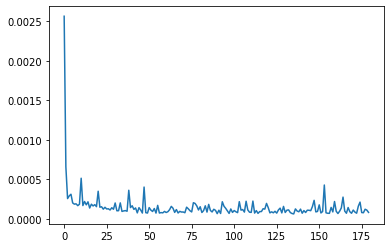

In [62]:
plt.plot(list(histories.values())[0].history['val_loss'])

In [74]:
from sklearn.metrics import mean_squared_error
y_test = y_test.reshape(-1,1)
y_test_transform = scaler_y.transform(y_test)
X_test = scaler_x.transform(X_test)
y_pred = model.predict(X_test)
mean_squared_error(y_test_transform, y_pred)
scaler_y.inverse_transform(y_pred)

0.000102086204

In [80]:
tick = 'NVDA'
import pandas_datareader as pdr
def getTestData(ticker, start):
    data = pdr.get_data_yahoo(ticker, start=start, end=today)
    # dataname= ticker+"_"+str(today)
    return data[-100:]
    
from datetime import date  
today = date.today()

from datetime import datetime, timedelta
start = d = today - timedelta(days=190)

df = getTestData(tick,start) 

In [81]:
df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Open'] - df['Close']
df['7MA'] = df['Adj Close'].rolling(window=7).mean()
df['14MA'] = df['Adj Close'].rolling(window=14).mean()
df['21MA'] = df['Adj Close'].rolling(window=21).mean()
df['7SD'] = df['Adj Close'].rolling(window=7).std()

test_data = np.asarray(df[-1:][features], np.float32)
test = scaler_x.transform(test_data)
pred = model.predict(test)  
pred_price = scaler_y.inverse_transform(pred)

### Multivariate LSTM with more features

In [9]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import math
from zipfile import ZipFile
import pickle
import os
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from firebase_admin import storage
from sklearn.metrics import mean_squared_error
import pandas_ta as ta

In [ ]:
# histories = {}
for tick in data.keys():
    stock_data = data[tick]
    stock_data = files[1][0]
    df = pd.DataFrame(stock_data).T
    df['H-L'] = df['High'] - df['Low']
    df['O-C'] = df['Open'] - df['Close']
    df['5MA'] = df['Adj Close'].rolling(window=5).mean()
    df['10MA'] = df['Adj Close'].rolling(window=10).mean()
    df['20MA'] = df['Adj Close'].rolling(window=20).mean()
    df['7SD'] = df['Adj Close'].rolling(window=7).std()
    df["EMA8"] = df['Adj Close'].ewm(span=8).mean()
    df["EMA21"] = df['Adj Close'].ewm(span=21).mean()
    df['EMA34'] = df['Adj Close'].ewm(span=34).mean()
    df['EMA55'] = df['Adj Close'].ewm(span=55).mean()
    df.dropna(inplace=True)
    df['Returns'] = df['Close'] / df['Close'].shift(1)
    df['Returns'] -= 1
    df.dropna(inplace=True)
    df.ta.rsi(close='Close', length=14, append=True)
    df.dropna(inplace=True)

    features = ['Adj Close','H-L','O-C','5MA','10MA','20MA','7SD','RSI_14', 'EMA8','EMA21','EMA34','EMA55','Returns','Volume']
    df = df[features].apply(pd.to_numeric)
    train_data = int(0.9*len(df))
    val_data = int(0.05*len(df))
    train_df,val_df, test_df = df[1:train_data], df[train_data:-val_data], df[-val_data:]
    sc = MinMaxScaler()

    train = sc.fit_transform(train_df)
    val = sc.transform(val_df)
    test = sc.transform(test_df)
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []

    timesteps = 50
    hl = [40,35,50]
    batch = 32
    epochs = 8

    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)

    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)

    # Adding Layers to the model
    model = Sequential()
    model.add(LSTM(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                    activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    #print(model.summary())

    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),
                        shuffle = False)
    histories[tick] = history
    model.reset_states()

    filepath_model = "../../../data/models/" + tick + "/multi_lstm"
    model.save(filepath_model)
    file_paths = get_all_file_paths(filepath_model)

    
    #took help from this: https://www.geeksforgeeks.org/working-zip-files-python/
    with ZipFile(filepath_model + ".zip",'w') as zip:
            # writing each file one by one
            for file in file_paths:
                zip.write(file)
    
    
    fileName_model = "multi_lstm.zip"
    bucket = storage.bucket()
    #upload models
    blob = bucket.blob("models/" + tick + "/" + fileName_model)
    blob.upload_from_filename(filepath_model+".zip")
    
    #upload normalizer training data
    filepath_normalizer = "../../../data/normalizers/" + tick + "/multi_lstm.pkl"
    pickle.dump(sc, open(filepath_normalizer, 'wb'))

    filename_normalizer = "multi_lstm.pkl"
    blob = bucket.blob("normalizers/" + tick + "/multi_lstm.pkl")
    blob.upload_from_filename(filepath_normalizer)


In [247]:
#the model with 7 trading days, and without pca
histories = {}
# for tick in data.keys():
for tick in data.keys():
    stock_data = data[tick]
    stock_data = files[1][0]
    df = pd.DataFrame(stock_data).T
# df = pd.DataFrame(stock_data).T
    df['H-L'] = df['High'] - df['Low']
    df['O-C'] = df['Open'] - df['Close']
    df['5MA'] = df['Adj Close'].rolling(window=5).mean()
    df['10MA'] = df['Adj Close'].rolling(window=10).mean()
    df['20MA'] = df['Adj Close'].rolling(window=20).mean()
    df['7SD'] = df['Adj Close'].rolling(window=7).std()
    df["EMA8"] = df['Adj Close'].ewm(span=8).mean()
    df["EMA21"] = df['Adj Close'].ewm(span=21).mean()
    df['EMA34'] = df['Adj Close'].ewm(span=34).mean()
    df['EMA55'] = df['Adj Close'].ewm(span=55).mean()
    df.dropna(inplace=True)
    df['Returns'] = df['Close'] / df['Close'].shift(1)
    df['Returns'] -= 1
    df.dropna(inplace=True)
    df.ta.rsi(close='Close', length=14, append=True)
    df.dropna(inplace=True)

    features = ['Adj Close','H-L','O-C','5MA','10MA','20MA','7SD','RSI_14', 'EMA8','EMA21','EMA34','EMA55','Returns','Volume']
    df = df[features].apply(pd.to_numeric)
    train_data = int(0.9*len(df))

    train_df,val_df = df[1:train_data], df[train_data:]
    sc_x = MinMaxScaler()
    sc_y = MinMaxScaler()


    features_x = ['H-L','O-C','5MA','10MA','20MA','7SD','RSI_14', 'EMA8','EMA21','EMA34','EMA55','Returns','Volume']
    X_tr = train_df[features_x]
    Y_tr = train_df['Adj Close']
    x_train_scaled = sc_x.fit_transform(X_tr)
    y_train_scaled = sc_y.fit_transform(np.array(Y_tr).reshape(-1, 1))

    X_ts = val_df[features_x]
    Y_ts = val_df['Adj Close']
    x_val_scaled = sc_x.transform(X_ts)
    y_val_scaled = sc_y.transform(np.array(Y_ts).reshape(-1, 1))

    X_train = []
    Y_train = []
    X_val = []
    Y_val = []

    timesteps = 7
            # Loop for training data
    for i in range(timesteps,train.shape[0]):
            
        X_train.append(x_train_scaled[i-timesteps:i])
        Y_train.append(y_train_scaled[i][0])
            
    X_train,Y_train = np.array(X_train),np.array(Y_train)

            # Loop for val data
    for i in range(timesteps,val.shape[0]):

        X_val.append(x_val_scaled[i-timesteps:i])
        Y_val.append(y_val_scaled[i][0])

    X_val,Y_val = np.array(X_val),np.array(Y_val)

    hl = [40,35,40,50]
    batch = 16
    epochs = 4


    # Adding Layers to the model
    model = Sequential()
    model.add(LSTM(40,input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                            activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
            #print(model.summary())

            # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val))
    histories[tick] = history
    model.reset_states()

    # tick = 'AAPL'
    filepath_model = f"../../../data/models/{tick}/multi_lstm"
    model.save(filepath_model)
    file_paths = get_all_file_paths(filepath_model)


    #took help from this: https://www.geeksforgeeks.org/working-zip-files-python/
    with ZipFile(filepath_model + ".zip",'w') as zip:
            # writing each file one by one
            for file in file_paths:
                zip.write(file)


    fileName_model = "multi_lstm.zip"
    bucket = storage.bucket()
    #upload models
    blob = bucket.blob(f"models/{tick}/" + fileName_model)
    blob.upload_from_filename(filepath_model+".zip")

    #upload normalizer training data
    filepath_normalizer = f"../../../data/normalizers/{tick}/multi_lstm_x.pkl"
    pickle.dump(sc_x, open(filepath_normalizer, 'wb'))

    filename_normalizer = "multi_lstm_x.pkl"
    blob = bucket.blob(f"normalizers/{tick}/multi_lstm_x.pkl")
    blob.upload_from_filename(filepath_normalizer)

    #upload normalizer training data
    filepath_normalizer = f"../../../data/normalizers/{tick}/multi_lstm_y.pkl"
    pickle.dump(sc_y, open(filepath_normalizer, 'wb'))

    filename_normalizer = "multi_lstm_y.pkl"
    blob = bucket.blob(f"normalizers/{tick}/multi_lstm_y.pkl")
    blob.upload_from_filename(filepath_normalizer)

    

Epoch 1/4
71/71 [==============================] - 21s 97ms/step - loss: 2.0676e-04 - val_loss: 1.0693
Epoch 2/4
71/71 [==============================] - 6s 79ms/step - loss: 1.6010e-04 - val_loss: 1.0449
Epoch 3/4
71/71 [==============================] - 6s 80ms/step - loss: 1.0193e-04 - val_loss: 0.1253
Epoch 4/4
71/71 [==============================] - 5s 75ms/step - loss: 2.4640e-05 - val_loss: 0.0335


In [ ]:
#model with 7 trading days with pca
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
tick = 'GOOG'
stock_data = data[tick]
# stock_data = files[1][0]
df = pd.DataFrame(stock_data).T
# df = pd.DataFrame(stock_data).T
df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Open'] - df['Close']
df['5MA'] = df['Adj Close'].rolling(window=5).mean()
df['10MA'] = df['Adj Close'].rolling(window=10).mean()
df['20MA'] = df['Adj Close'].rolling(window=20).mean()
df['7SD'] = df['Adj Close'].rolling(window=7).std()
df["EMA8"] = df['Adj Close'].ewm(span=8).mean()
df["EMA21"] = df['Adj Close'].ewm(span=21).mean()
df['EMA34'] = df['Adj Close'].ewm(span=34).mean()
df['EMA55'] = df['Adj Close'].ewm(span=55).mean()
df.dropna(inplace=True)
df['Returns'] = df['Close'] / df['Close'].shift(1)
df['Returns'] -= 1
df.dropna(inplace=True)
df.ta.rsi(close='Close', length=14, append=True)
df.dropna(inplace=True)

features = ['Adj Close','H-L','O-C','5MA','10MA','20MA','7SD','RSI_14', 'EMA8','EMA21','EMA34','EMA55','Returns','Volume']
df = df[features].apply(pd.to_numeric)
train_data = int(0.9*len(df))

train_df,val_df = df[1:train_data], df[train_data:]
sc_x = MinMaxScaler()
sc_y = MinMaxScaler()


features_x = ['H-L','O-C','5MA','10MA','20MA','7SD','RSI_14', 'EMA8','EMA21','EMA34','EMA55','Returns','Volume']
X_tr = train_df[features_x]
Y_tr = train_df['Adj Close']
x_train_scaled = sc_x.fit_transform(X_tr)
y_train_scaled = sc_y.fit_transform(np.array(Y_tr).reshape(-1, 1))

X_ts = val_df[features_x]
Y_ts = val_df['Adj Close']
x_val_scaled = sc_x.transform(X_ts)
y_val_scaled = sc_y.transform(np.array(Y_ts).reshape(-1, 1))

x_train_pca = pca.fit_transform(x_train_scaled)
x_val_pca = pca.transform(x_val_scaled)

X_train = []
Y_train = []
X_val = []
Y_val = []

timesteps = 7
        # Loop for training data
for i in range(timesteps,train_df.shape[0]):
        
    X_train.append(x_train_pca[i-timesteps:i])
    Y_train.append(y_train_scaled[i][0])
        
X_train,Y_train = np.array(X_train),np.array(Y_train)

        # Loop for val data
for i in range(timesteps,val_df.shape[0]):

    X_val.append(x_val_pca[i-timesteps:i])
    Y_val.append(y_val_scaled[i][0])

X_val,Y_val = np.array(X_val),np.array(Y_val)

hl = [40,35,40,50]
batch = 16
epochs = 8


# Adding Layers to the model
model = Sequential()
model.add(LSTM(40,input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                        activation = 'relu'))
for i in range(len(hl)-1):        
    model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
model.add(LSTM(hl[-1],activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#print(model.summary())

# Training the data
history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val))

histories[tick] = history
model.reset_states()

# tick = 'AAPL'
filepath_model = f"../../../data/models/{tick}/multi_lstm"
model.save(filepath_model)
file_paths = get_all_file_paths(filepath_model)


#took help from this: https://www.geeksforgeeks.org/working-zip-files-python/
with ZipFile(filepath_model + ".zip",'w') as zip:
        # writing each file one by one
        for file in file_paths:
            zip.write(file)


fileName_model = "multi_lstm.zip"
bucket = storage.bucket()
#upload models
blob = bucket.blob(f"models/{tick}/" + fileName_model)
blob.upload_from_filename(filepath_model+".zip")

# upload normalizer training data
filepath_normalizer = f"../../../data/normalizers/{tick}/multi_lstm_x.pkl"
pickle.dump(sc_x, open(filepath_normalizer, 'wb'))

filename_normalizer = "multi_lstm_x.pkl"
blob = bucket.blob(f"normalizers/{tick}/multi_lstm_x.pkl")
blob.upload_from_filename(filepath_normalizer)

#upload normalizer training data
filepath_normalizer = f"../../../data/normalizers/{tick}/multi_lstm_y.pkl"
pickle.dump(sc_y, open(filepath_normalizer, 'wb'))

filename_normalizer = "multi_lstm_y.pkl"
blob = bucket.blob(f"normalizers/{tick}/multi_lstm_y.pkl")
blob.upload_from_filename(filepath_normalizer)

#upload pca file
filepath_pca = f"../../../data/normalizers/{tick}/multi_lstm_pca.pkl"
pickle.dump(pca, open(filepath_pca, 'wb'))

filename_pca = "multi_lstm_pca.pkl"
blob = bucket.blob(f"normalizers/{tick}/multi_lstm_pca.pkl")
blob.upload_from_filename(filepath_pca)




In [ ]:
#saving plot images for the frontend
def plot_error(train_loss,val_loss,file_path,tick):
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title(tick + ' loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(file_path)
    plt.show()
folder_path = '../../frontend_react/public/images/multi_lstm/'
for tick in histories.keys():
    plot_error(histories[tick].history['loss'],histories[tick].history['val_loss'],folder_path + tick + '_with_pca_loss.jpg',tick)

In [4]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

profile.to_file(output_file='get_info.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 91.43it/s]


### Backtesting for ANN

In [359]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from keras.models import load_model
import pandas_datareader as pdr
from datetime import date
import pickle
import numpy as np
from tqdm import tqdm

tickers = ['TSLA', 'AAPL', 'GOOG']
weights = [0.087,0.301,0.602]

for ind,tick in enumerate(tickers):
    weight = weights[ind]
    rate = 0.008

    #return_obj = {}

    today = date.today()
    data = yf.download(tickers=tick, period='60d', interval='5m')

    data['date'] = data.index.date

    start_date = '2021-8-26'
    # end_date= "2022-1-17"
    df = pdr.get_data_yahoo(tick, start=start_date, end=today)

    df = df[-81:]


    df['H-L'] = df['High'] - df['Low']
    df['O-C'] = df['Open'] - df['Close']
    df['7MA'] = df['Adj Close'].rolling(window=7).mean()
    df['14MA'] = df['Adj Close'].rolling(window=14).mean()
    df['21MA'] = df['Adj Close'].rolling(window=21).mean()
    df['7SD'] = df['Adj Close'].rolling(window=7).std()
    features = ['H-L','O-C','7MA','14MA','21MA','7SD','Volume']

    scaler_path = "../../../data/normalizers/" + tick + "/ann_x.pkl"
    model_path = "../../../data/models/" + tick + "/ann"

    if(os.path.exists(model_path)):
        model = load_model(model_path)
    if(os.path.exists(scaler_path)):
        with open(scaler_path, "rb") as input_file:
            scaler_x = pickle.load(input_file)

    scaler_path = "../../../data/normalizers/" + tick + "/ann_y.pkl"
    if(os.path.exists(scaler_path)):
        with open(scaler_path, "rb") as input_file:
            scaler_y = pickle.load(input_file)


    profit = 0
    wins = 0
    loss = 0
    index = 0

    portfolio_value = 10000
    # error_pct = -1.5707761096672937
    returns = []
    open_prices = []
    close_prices = []
    groups = data.groupby(data.date)

    for row in tqdm(df[21:-1][features].iterrows()):

        present_close_price = df['Close'][index+21]

        row = np.asarray(df[index +21:index+22][features], np.float32)
        scaled_row = scaler_x.transform(row)
        prediction = model.predict(scaled_row)  
        prediction_value = scaler_y.inverse_transform(prediction)[0][0]

        next_group = groups.get_group(data.date[index+1])
        next_open_price = df['Open'][index+22]
        next_close_price = df['Close'][index+22]
        next_high_price = next_group['High'].max()
        next_low_price = next_group['Low'].min()

        weighted_value = weight*(portfolio_value+profit)
        n_shares = weighted_value/present_close_price
        # print(n_shares)

        if(prediction_value > present_close_price):
            boolean = False

            for row in next_group.iloc():
                if(row['High'] >= prediction_value):
                    difference = (prediction_value - next_open_price)*n_shares

                    returns.append((prediction_value-rate*prediction_value)/next_open_price)
                    

                    # differences.append(percent_change)
                    profit += difference
                    profit -= rate*present_close_price*n_shares
                    if(difference > 0):
                        wins += 1
                    else:
                        loss += 1
                    
                    boolean = True
                    break
            if(not boolean):
                difference = (next_close_price - next_open_price)*n_shares

                returns.append((next_close_price-rate*next_close_price)/next_open_price)

                # differences.append(percent_change)
                profit += difference
                profit -= rate*present_close_price*n_shares
                if(difference > 0):
                    wins += 1
                else:
                    loss += 1
        
        else:
            for row in next_group.iloc():
                boolean = False
                if(row['Low'] <= prediction_value):

                    difference = (next_open_price - prediction_value)*n_shares
                    
                    returns.append((next_open_price-rate*next_open_price)/prediction_value)
                    # differences.append(percent_change)

                    profit += difference
                    profit -= rate*present_close_price*n_shares
                    if(difference > 0):
                        wins += 1
                    else:
                        loss += 1
                    
                    boolean = True
                    break
            if(not boolean):

                difference = (next_open_price - next_close_price)*n_shares
                    
                returns.append((next_open_price-rate*next_open_price)/next_close_price)
                # differences.append(percent_change)

                profit += difference
                profit -= rate*present_close_price*n_shares
                if(difference > 0):
                    wins += 1
                else:
                    loss += 1

        index +=1
                

    print(f'{tick} Profit using LSTM ', profit, wins, loss)
    


return_obj[tick] = returns

[*********************100%***********************]  1 of 1 completed


59it [00:04, 12.22it/s]


TSLA Profit using LSTM  1006.2399217622491 39 20
[*********************100%***********************]  1 of 1 completed


59it [00:04, 12.85it/s]


AAPL Profit using LSTM  1085.9567733908993 44 15
[*********************100%***********************]  1 of 1 completed


59it [00:05, 10.81it/s]

GOOG Profit using LSTM  790.7952728446987 39 20


In [368]:
df_returns = pd.DataFrame(return_obj)
log_return = np.log(df_returns)
# weights = [0.087,0.311,0.602]

def get_ret_vol_sr(weights): 
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    risk_free_rate = 0.025
    sr = (ret-risk_free_rate)/vol 
    return np.array([ret,vol,sr])

get_ret_vol_sr(weights)



array([1.93145235, 0.36614816, 5.20677842])

### Backtesting for LSTM

In [361]:
returns_obj_lstm = {}

In [365]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from keras.models import load_model
import pandas_datareader as pdr
from datetime import date
import pickle
import numpy as np
from tqdm import tqdm

tickers = ['TSLA', 'AAPL', 'GOOG']
weights = [0.087,0.301,0.602]

for ind,tick in enumerate(tickers):
    weight = weights[ind]
    rate = 0.008


    data = yf.download(tickers=tick, period='60d', interval='5m')

    data['date'] = data.index.date

    start_date = '2021-8-26'
    end_date= "2022-1-17"
    data_new = pdr.get_data_yahoo(tick, start=start_date, end=end_date)

    closing_prices = list(data_new['Close'])
    open_prices = list(data_new['Open'])

    closing_prices_present = []
    open_prices_present = []

    for name, group in data.groupby(data.date):
    
        closing_prices_present.append(list(group[-1:]['Close'])[-1])
        open_prices_present.append(list(group[:1]['Open'])[-1])

    closing_prices.extend(closing_prices_present)
    open_prices.extend(open_prices_present)


    scaler_path = "../../../data/normalizers/" + tick + "/lstm.pkl"
    model_path = "../../../data/models/" + tick + "/lstm"


    if(os.path.exists(model_path)):
        model = load_model(model_path)
    if(os.path.exists(scaler_path)):
        with open(scaler_path, "rb") as input_file:
            scaler = pickle.load(input_file)

    dataset = scaler.transform(np.array(closing_prices).reshape(-1,1))

    time_step = 100
    profit = 0
    wins = 0
    loss = 0

    portfolio_value = 10000
    # error_pct = -1.5707761096672937
    returns = []


    groups = data.groupby(data.date)
    
    for i in range(len(dataset)-time_step-1):
        present_close_price = closing_prices[i+time_step-1]

        next_group = groups.get_group(data.date[i+1])
        next_open_price = open_prices[i+time_step]
        next_close_price = closing_prices[i+time_step]
        next_high_price = next_group['High'].max()
        next_low_price = next_group['Low'].min()

        data_pred = dataset[i:(i+time_step), 0]
        test_data = data_pred.reshape(-1,1)
        test_data = np.array([test_data,])
        prediction = model.predict(test_data)
        prediction_value = scaler.inverse_transform(prediction)[0][0]

        weighted_value = weight*(portfolio_value+profit)
        n_shares = weighted_value/present_close_price
        # print(n_shares)

        if(prediction_value > present_close_price):
            boolean = False

            for row in next_group.iloc():
                if(row['High'] >= prediction_value):
                    difference = (prediction_value - next_open_price)*n_shares
                    returns.append((prediction_value-rate*prediction_value)/next_open_price)

                    # differences.append(percent_change)
                    profit += difference
                    profit -= rate*present_close_price*n_shares
                    if(difference > 0):
                        wins += 1
                    else:
                        loss += 1
                    
                    boolean = True
                    break
            if(not boolean):
                difference = (next_close_price - next_open_price)*n_shares
                returns.append((next_close_price-rate*next_close_price)/next_open_price)

                # differences.append(percent_change)
                profit += difference
                profit -= rate*present_close_price*n_shares
                if(difference > 0):
                    wins += 1
                else:
                    loss += 1
        
        else:
            for row in next_group.iloc():
                boolean = False
                if(row['Low'] <= prediction_value):

                    difference = (next_open_price - prediction_value)*n_shares
                    
                    returns.append((next_open_price-rate*next_open_price)/prediction_value)
                    # differences.append(percent_change)

                    profit += difference
                    profit -= rate*present_close_price*n_shares
                    if(difference > 0):
                        wins += 1
                    else:
                        loss += 1
                    
                    boolean = True
                    break
            if(not boolean):

                difference = (next_open_price - next_close_price)*n_shares
                    
                returns.append((next_open_price-rate*next_open_price)/next_close_price)
                # differences.append(percent_change)

                profit += difference
                profit -= rate*present_close_price*n_shares
                if(difference > 0):
                    wins += 1
                else:
                    loss += 1
                

    print(f'{tick} Profit using LSTM ', profit, wins, loss)
    

    returns_obj_lstm[tick] = returns


[*********************100%***********************]  1 of 1 completed
TSLA Profit using LSTM  1433.7394481471229 45 14
[*********************100%***********************]  1 of 1 completed
AAPL Profit using LSTM  -167.03675766487433 36 23
[*********************100%***********************]  1 of 1 completed
GOOG Profit using LSTM  -108.62851300315634 35 24


In [367]:
df_returns = pd.DataFrame(returns_obj_lstm)
log_return = np.log(df_returns)

def get_ret_vol_sr(weights): 
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    risk_free_rate = 0.025
    sr = (ret-risk_free_rate)/vol 
    return np.array([ret,vol,sr])

get_ret_vol_sr(weights)



array([0.46233293, 0.33061453, 1.32278799])

### Combining NLP and Time Series Analysis

In [281]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import math
from zipfile import ZipFile
import pickle
import os
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from firebase_admin import storage
from sklearn.metrics import mean_squared_error
import pandas_ta as ta
from sklearn.decomposition import PCA

from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf

yf.pdr_override()
import pandas as pd

ticker_list=["AAPL", "MSFT", "AMZN", "TSLA", "GOOGL"]
today = date.today()
# We can get data by our choice by giving days bracket
start_date= "2015-01-01"
end_date="2020-11-30"

files=[]
def getData(ticker):
    data = pdr.get_data_yahoo(ticker, start=start_date, end=today)
    # dataname= ticker+"_"+str(today)
    files.append((data,ticker))
    
for tik in ticker_list:
    getData(tik)

histories = {}
for tick in data.keys():
    # stock_data = data[tick]
    stock_data = files[1][0]
    df = pd.DataFrame(stock_data).T
    df['H-L'] = df['High'] - df['Low']
    df['O-C'] = df['Open'] - df['Close']
    df['5MA'] = df['Adj Close'].rolling(window=5).mean()
    df['10MA'] = df['Adj Close'].rolling(window=10).mean()
    df['20MA'] = df['Adj Close'].rolling(window=20).mean()
    df['7SD'] = df['Adj Close'].rolling(window=7).std()
    df["EMA8"] = df['Adj Close'].ewm(span=8).mean()
    df["EMA21"] = df['Adj Close'].ewm(span=21).mean()
    df['EMA34'] = df['Adj Close'].ewm(span=34).mean()
    df['EMA55'] = df['Adj Close'].ewm(span=55).mean()
    df.dropna(inplace=True)
    df['Returns'] = df['Close'] / df['Close'].shift(1)
    df['Returns'] -= 1
    df.dropna(inplace=True)
    df.ta.rsi(close='Close', length=14, append=True)
    df.dropna(inplace=True)

    features = ['Adj Close','H-L','O-C','5MA','10MA','20MA','7SD','RSI_14', 'EMA8','EMA21','EMA34','EMA55','Returns','Volume']
    df = df[features].apply(pd.to_numeric)

    #make the index as a column and rename it to 'Date'
    df.reset_index(inplace = True)
    df.rename(columns = {'index': 'Date'}, inplace = True)

    #read the news sentiment data given by Varun
    news_sentiment = pd.read_csv(f'../../../data/sentiment data/{tick}_data.csv')
    news_sentiment.drop('Unnamed: 0', axis = 1, inplace = True)


    #merge on date
    df_comb = pd.merge(news_sentiment, df, how='inner', on='Date')

    #replace index to date again
    df_comb.set_index('Date', inplace = True)

    #drop the buy sell columns
    df_comb.drop(['Buy', 'Sell'], inplace = True, axis = 1)

    train_data = int(0.9*len(df_comb))

    train_df,val_df = df_comb[1:train_data], df_comb[train_data:]
    sc_x = MinMaxScaler()
    sc_y = MinMaxScaler()


    features_x = ['H-L','O-C','5MA','10MA','20MA','7SD','RSI_14', 'EMA8','EMA21','EMA34','EMA55','Returns','Volume', 'Vander_Score']
    X_tr = train_df[features_x]
    Y_tr = train_df['Adj Close']
    x_train_scaled = sc_x.fit_transform(X_tr)
    y_train_scaled = sc_y.fit_transform(np.array(Y_tr).reshape(-1, 1))

    X_ts = val_df[features_x]
    Y_ts = val_df['Adj Close']
    x_val_scaled = sc_x.transform(X_ts)
    y_val_scaled = sc_y.transform(np.array(Y_ts).reshape(-1, 1))

    pca = PCA(n_components=4)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_val_pca = pca.transform(x_val_scaled)

    X_train = []
    Y_train = []
    X_val = []
    Y_val = []

    timesteps = 7
        # Loop for training data
    for i in range(timesteps,x_train_scaled.shape[0]):
        
        X_train.append(x_train_pca[i-timesteps:i])
        Y_train.append(y_train_scaled[i][0])
        
    X_train,Y_train = np.array(X_train),np.array(Y_train)

        # Loop for val data
    for i in range(timesteps,x_val_scaled.shape[0]):

        X_val.append(x_val_pca[i-timesteps:i])
        Y_val.append(y_val_scaled[i][0])

    X_val,Y_val = np.array(X_val),np.array(Y_val)

    hl = [40,35,50]
    batch = 32
    epochs = 15
    model = Sequential()
    model.add(LSTM(40,input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                        activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
        #print(model.summary())

    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),
                            shuffle = False)

    histories[tick] = history
    model.reset_states()

    filepath_model = "../../../data/models/" + tick + "/combination_model1"
    model.save(filepath_model)
    file_paths = get_all_file_paths(filepath_model)


    #took help from this: https://www.geeksforgeeks.org/working-zip-files-python/
    with ZipFile(filepath_model + ".zip",'w') as zip:
            # writing each file one by one
            for file in file_paths:
                zip.write(file)


    fileName_model = "combination_model1.zip"
    bucket = storage.bucket()
    #upload models
    blob = bucket.blob("models/" + tick + "/" + fileName_model)
    blob.upload_from_filename(filepath_model+".zip")

    #upload normalizer features data
    filepath_normalizer = "../../../data/normalizers/" + tick + "/combination_model1_X.pkl"
    pickle.dump(sc_x, open(filepath_normalizer, 'wb'))

    filename_normalizer = "combination_model1.pkl"
    blob = bucket.blob("normalizers/" + tick + "/combination_model1_X.pkl")
    blob.upload_from_filename(filepath_normalizer)

    #upload normalizer labels data
    filepath_normalizer = "../../../data/normalizers/" + tick + "/combination_model1_Y.pkl"
    pickle.dump(sc_y, open(filepath_normalizer, 'wb'))

    filename_normalizer = "combination_model1.pkl"
    blob = bucket.blob("normalizers/" + tick + "/combination_model1_Y.pkl")
    blob.upload_from_filename(filepath_normalizer)

    #upload normalizer labels data
    filepath_normalizer = "../../../data/normalizers/" + tick + "/combination_model1_pca.pkl"
    pickle.dump(pca, open(filepath_normalizer, 'wb'))

    filename_normalizer = "combination_model1.pkl"
    blob = bucket.blob("normalizers/" + tick + "/combination_model1_pca.pkl")
    blob.upload_from_filename(filepath_normalizer)

Epoch 1/15
36/36 [==============================] - 18s 160ms/step - loss: 0.1626 - val_loss: 0.0621
Epoch 2/15
36/36 [==============================] - 3s 91ms/step - loss: 0.0708 - val_loss: 0.0305
Epoch 3/15
36/36 [==============================] - 4s 112ms/step - loss: 0.0592 - val_loss: 0.0820
Epoch 4/15
36/36 [==============================] - 3s 95ms/step - loss: 0.0263 - val_loss: 0.0178
Epoch 5/15
36/36 [==============================] - 3s 93ms/step - loss: 0.0213 - val_loss: 0.0101
Epoch 6/15
36/36 [==============================] - 3s 94ms/step - loss: 0.0088 - val_loss: 0.0168
Epoch 7/15
36/36 [==============================] - 3s 96ms/step - loss: 0.0066 - val_loss: 0.0141
Epoch 8/15
36/36 [==============================] - 3s 92ms/step - loss: 0.0056 - val_loss: 0.0117
Epoch 9/15
36/36 [==============================] - 3s 92ms/step - loss: 0.0054 - val_loss: 0.0106
Epoch 10/15
36/36 [==============================] - 3s 91ms/step - loss: 0.0055 - val_loss: 0.0100
Epoch 

INFO:tensorflow:Assets written to: ../../../data/models/TSLA/combination_model1\assets


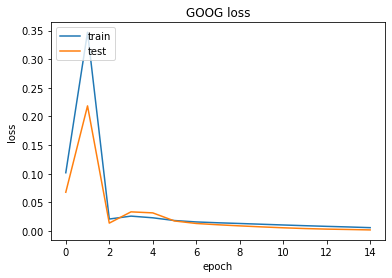

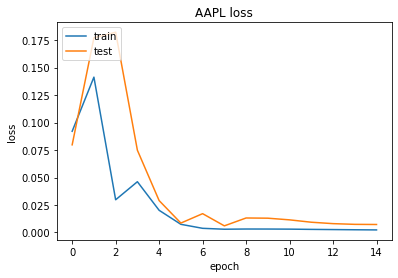

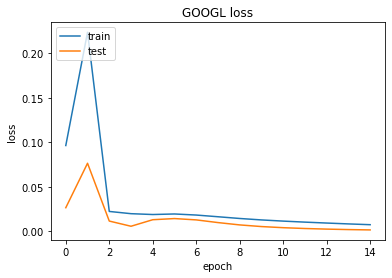

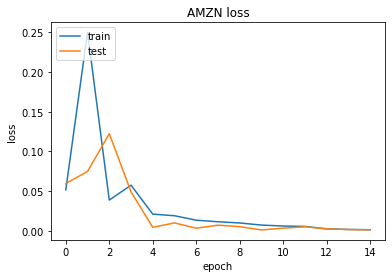

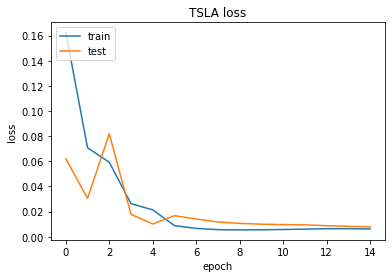

In [282]:
#saving plot images for the frontend
def plot_error(train_loss,val_loss,file_path,tick):
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title(tick + ' loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(file_path)
    plt.show()
folder_path = '../../frontend_react/public/images/combined_model1/'
for tick in histories.keys():
    plot_error(histories[tick].history['loss'],histories[tick].history['val_loss'],folder_path + tick + '_loss.jpg',tick)

In [286]:
import pickle
from flask import Flask, request,jsonify
import os
from pandas_datareader import data as pdr
from datetime import date, timedelta
import yfinance as yf
from keras.models import load_model
import pandas as pd
import numpy as np
import json
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler

def get_signal(tick):
    # tick = 'AAPL'
    today = date.today()
    print('multi lstm model loading')
    scaler_x_path = "../../../data/normalizers/" + tick + "/combination_model1_X.pkl"
    scaler_y_path = "../../../data/normalizers/" + tick + "/combination_model1_Y.pkl"
    model_path = "../../../data/models/" + tick + "/combination_model1"
    pca_path = "../../../data/normalizers/" + tick + "/combination_model1_pca.pkl"

    if(os.path.exists(model_path)):
        model = load_model(model_path)

    if(os.path.exists(scaler_x_path)):
        with open(scaler_x_path, "rb") as input_file:
            scaler_x = pickle.load(input_file)
            
    if(os.path.exists(scaler_y_path)):
        with open(scaler_y_path, "rb") as input_file:
            scaler_y = pickle.load(input_file)
    if(os.path.exists(pca_path)):
        with open(pca_path, "rb") as input_file:
            pca = pickle.load(input_file)

    print('loaded models')

    def getTestData(ticker, start): 
        data = pdr.get_data_yahoo(ticker, start=start, end=today)
        # dataname= ticker+"_"+str(today)
        return data[-350:-1]
                    
            
    start = today - timedelta(days=500)

    df = getTestData(tick,start) 
    storing_data = df['Close'].copy().to_json() 

    df['H-L'] = df['High'] - df['Low']
    df['O-C'] = df['Open'] - df['Close']
    df['5MA'] = df['Adj Close'].rolling(window=5).mean()
    df['10MA'] = df['Adj Close'].rolling(window=10).mean()
    df['20MA'] = df['Adj Close'].rolling(window=20).mean()
    df['7SD'] = df['Adj Close'].rolling(window=7).std()
    df["EMA8"] = df['Adj Close'].ewm(span=8).mean()
    df["EMA21"] = df['Adj Close'].ewm(span=21).mean()
    df['EMA34'] = df['Adj Close'].ewm(span=34).mean()
    df['EMA55'] = df['Adj Close'].ewm(span=55).mean()
    df.dropna(inplace=True)
    df['Returns'] = df['Close'] / df['Close'].shift(1)
    df['Returns'] -= 1
    df.dropna(inplace=True)
    df.ta.rsi(close='Close', length=14, append=True)
    df.dropna(inplace=True)
    previous_closing_price = list(df['Close'])[-1]

    features = ['Adj Close','H-L','O-C','5MA','10MA','20MA','7SD','RSI_14', 'EMA8','EMA21','EMA34','EMA55','Returns','Volume']
    df = df[features].apply(pd.to_numeric)

    df = df[-7:]

    # date_today = '2022-04-13'
    print('got data till 7 days')
    # tick = 'GOOG'
    df_sentiment = pd.read_csv(f'{today}_{tick}.csv')
    df['Vander_Score']= list(df_sentiment['Score'])
    print('read sentiment score')
    features_x = ['H-L','O-C','5MA','10MA','20MA','7SD','RSI_14', 'EMA8','EMA21','EMA34','EMA55','Returns','Volume', 'Vander_Score']
    scaled_x_data = scaler_x.transform(df[features_x])

    x_test_pca = pca.transform(scaled_x_data)

    scaled_data = x_test_pca.reshape((1,7,4))

    test_data = np.asarray(scaled_data, np.float32)
    pred = model.predict(test_data)  
    prediction_value = scaler_y.inverse_transform(pred)
    
    
    if(prediction_value > previous_closing_price):
        return 'Buy'
    else:
        return 'Sell'

get_signal('AAPL')


multi lstm model loading
loaded models
got data till 7 days
read sentiment score


'Buy'